# Linear models estimation workbook

In [25]:
%load_ext autoreload
%autoreload 1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%load_ext autoreload
%autoreload 1

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, median_absolute_error
import warnings

from computage.utils.data_utils import download_meta, download_dataset
from computage.utils.nan_utils import EN_nan_row_predict,introduce_nans

from computage.models_library.model import LinearMethylationModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%reload_ext autoreload

In [4]:
#modelsnames = list(dict_model_names_paths.keys())
modelsnames = ['hrsinchphenoage',
 'lin2016blood_99cpgs',
 'yingdamage',
 'yingadaptage',
 'hannum2013blood',
 'dec2023encen100',
 'yingcausage',
 'horvath2018',
 'vidal-bralo2016blood',
 'lin2016blood_3cpgs',
 'zhangblup2019',
 'zhangenclock2019',
 'phenoage2018',
 'dec2023encen40', 'horvath2018', 'horvath2013_shrunken', 'horvath2013', 'han2020blood']

In [5]:
from multiprocessing import Pool

def read_psv_all (file_name):
    return pd.read_csv(file_name,
                       #delimiter='',  # change this as needed                              
                       low_memory=False, index_col = ['Unnamed: 0']
                      ) 

pool = Pool(processes=3) # can change 3 to number of processors you want to utilize
data = read_psv_all('full_blood_HC.csv')
data.head()

meta = pd.read_csv('full_blood_HC_meta.csv',index_col = ['Unnamed: 0'])
meta.shape

y = pd.DataFrame(meta['Age'])
y = y.rename(columns={'Age': 'age'})
data = data.drop(y[y['age'].isnull()].index.tolist())
y = y.dropna()

In [28]:
data.shape

(1078, 487177)

In [29]:
def medae_r2(X,y,model):
    #nan_pct = [0.1]
    X_test = X.reindex(columns=model.features)
    y_test = y
    y_pred_test = model.predict(X_test)
    return median_absolute_error(y_test, y_pred_test),r2_score(y_test, y_pred_test) 

In [30]:
medaes = []
r2s = []
for mymodel in modelsnames:
    try:
        medae, r2 = medae_r2(data, y, LinearMethylationModel(mymodel, imputation='average'))
    except Exception:
        print(Exception)
        medae, r2 = None, None 
    medaes.append(medae)
    r2s.append(r2)       




In [9]:
# def anti_trafo(x, adult_age=20):
#     y = np.where(
#         x < 0, (1 + adult_age) * np.exp(x) - 1, (1 + adult_age) * x + adult_age
#     )
#     return y

In [10]:
%reload_ext autoreload

In [11]:
# models4 = ['horvath2018', 'horvath2013_shrunken', 'horvath2013', 'han2020blood']
# medaes4 = []
# r2s4 = []


# model = LinearMethylationModel(models4[3], imputation='average')
# X_test = data.reindex(columns=model.features)
# y_test = y
# y_pred_test = model.predict(X_test)
# #y_changed = anti_trafo(y_pred_test)

# median_absolute_error(y_test, y_pred_test)

49.4594581587

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [31]:
modelsnames.index('horvath2018')

13

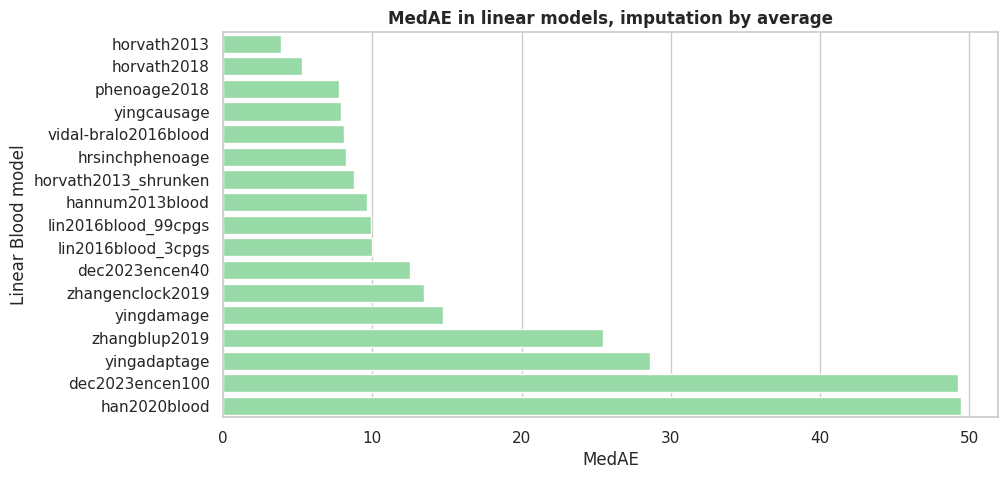

In [32]:
color = (0.2, # redness
         0.4, # greenness
         0.2, # blueness
         0.6 # transparency
         ) 
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize = (10, 5))
#plt.figure(figsize = (10, 5))
dfplot = pd.DataFrame({"modelsnames": modelsnames,
                   "medaes": medaes})
# Plot the total crashes
sns.set_color_codes("pastel")
dfplot = dfplot.sort_values('medaes')
sns.barplot(data=dfplot,x = 'medaes', y='modelsnames', color = 'g')
#s.bar_label(s.containers[0], fontsize=10);

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="lower right", frameon=True)
#sns.despine(left=True, bottom=True)


ax.set_xlabel('MedAE')
ax.set_ylabel('Linear Blood model')
ax.set_title('MedAE in linear models, imputation by average', weight='bold')
#ax.legend(title='linear model')

plt.show()

In [33]:
dfplot = dfplot.round(2)
dfplot

,modelsnames,medaes
15,horvath2013,3.86
13,horvath2018,5.30
11,phenoage2018,7.79
6,yingcausage,7.93
7,vidal-bralo2016blood,8.07
0,hrsinchphenoage,8.24
14,horvath2013_shrunken,8.76
4,hannum2013blood,9.63
1,lin2016blood_99cpgs,9.88
8,lin2016blood_3cpgs,9.97


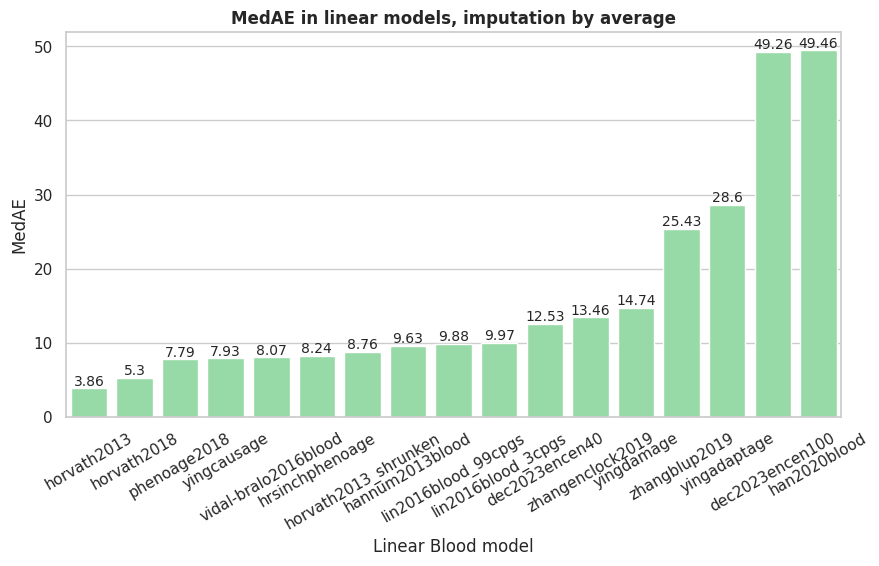

In [34]:

fig, ax = plt.subplots(figsize = (10, 5))
s = sns.barplot(data=dfplot, x='modelsnames', y= 'medaes', color = 'g')
s.bar_label(s.containers[0], fontsize=10)

ax.set_ylabel('MedAE')
ax.set_xlabel('Linear Blood model')
ax.set_title('MedAE in linear models, imputation by average', weight='bold')
plt.xticks(rotation=30)
plt.show()

'phenoage2018'
'yingcausage',
'vidal-bralo2016blood',
'hrsinchphenoage',
'hannum2013blood'

In [35]:
def pred(X,model):
   
    X_test = X.reindex(columns=model.features)
    
    y_pred_test = model.predict(X_test)
    return y_pred_test 

In [36]:
#'horvath2018', 'horvath2013_shrunken', 'horvath2013'
topmodels = ['actual age','horvath2013','horvath2018','phenoage2018',
'yingcausage',
'vidal-bralo2016blood']
y_reset = y.reset_index(drop=True)
top_models_preds = [y_reset]
for model in topmodels[1:]:
    # set the first column as index
    y_pred_test = pred(data,LinearMethylationModel(model, imputation='average'))
    top_models_preds.append(pd.DataFrame(y_pred_test))
general = pd.concat(top_models_preds, axis=1, join='outer', ignore_index=True)
#general.columns = ['actual age', ]
#general = general.loc[:,1:]

In [37]:
general.columns = topmodels
general

,actual age,horvath2013,horvath2018,phenoage2018,yingcausage,vidal-bralo2016blood
0,79.0,76.140158,79.024037,68.384659,83.869571,52.793431
1,90.0,73.318147,80.050409,71.624863,85.038432,67.276990
2,78.0,75.765291,78.504280,74.193826,85.643776,64.381156
3,84.0,73.022601,75.009205,69.468992,79.390100,69.294662
4,76.0,68.162827,78.346512,69.290751,80.310157,60.664035
...,...,...,...,...,...,...
1073,52.0,50.209395,62.615823,66.319520,64.411564,49.430215
1074,45.0,50.612298,57.248900,60.034890,55.408574,45.579486
1075,55.0,55.477720,60.755691,61.891068,58.575883,45.088937
1076,49.0,49.296721,62.287771,59.135157,58.323247,42.829291


In [39]:
mae1 = median_absolute_error(general['actual age'].values,general['horvath2013'].values)
mae2 = median_absolute_error(general['actual age'].values,general['horvath2018'].values)
mae3 = median_absolute_error(general['actual age'].values,general['phenoage2018'].values)
mae4 = median_absolute_error(general['actual age'].values,general['yingcausage'].values)
mae5 = median_absolute_error(general['actual age'].values,general['vidal-bralo2016blood'].values)

r2_1 = r2_score(general['actual age'].values,general['horvath2013'].values)
r2_2 = r2_score(general['actual age'].values,general['horvath2018'].values)
r2_3 = r2_score(general['actual age'].values,general['phenoage2018'].values)
r2_4 = r2_score(general['actual age'].values,general['yingcausage'].values)
r2_5 = r2_score(general['actual age'].values,general['vidal-bralo2016blood'].values)

<Axes: xlabel='actual age', ylabel='prediction'>

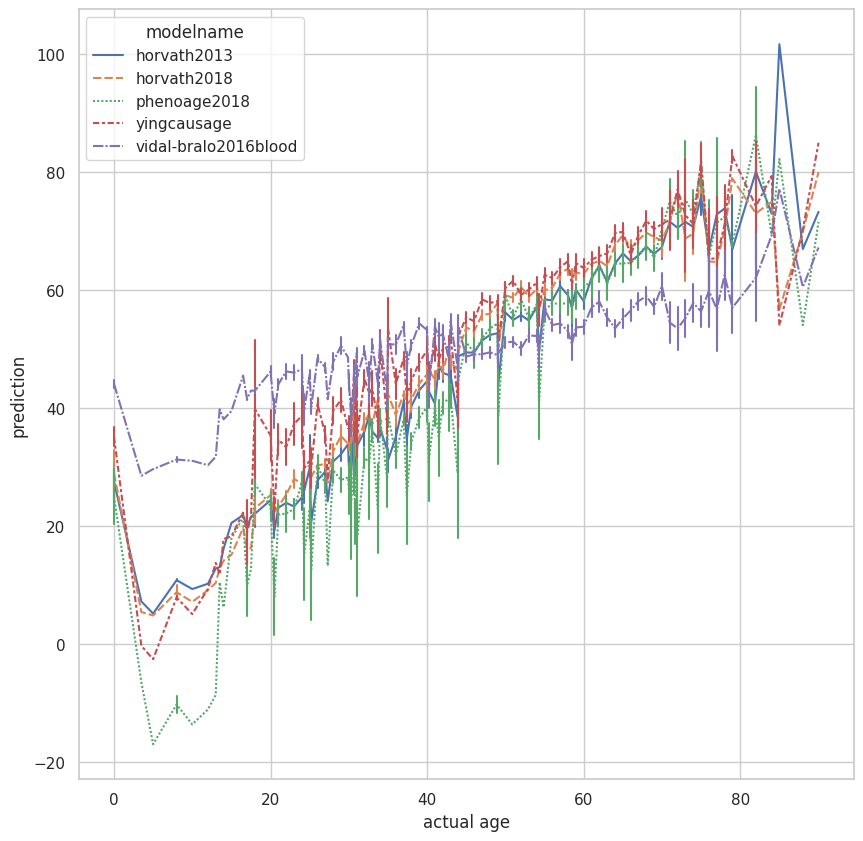

In [40]:
dfm = general.melt('actual age', var_name='modelname', value_name='prediction')

fig, ax = plt.subplots(figsize = (10, 10))
sns.set_theme(style="whitegrid")
sns.lineplot(data=dfm, y='prediction', x = 'actual age', hue='modelname' , style='modelname',err_style="bars", errorbar=("se", 1))

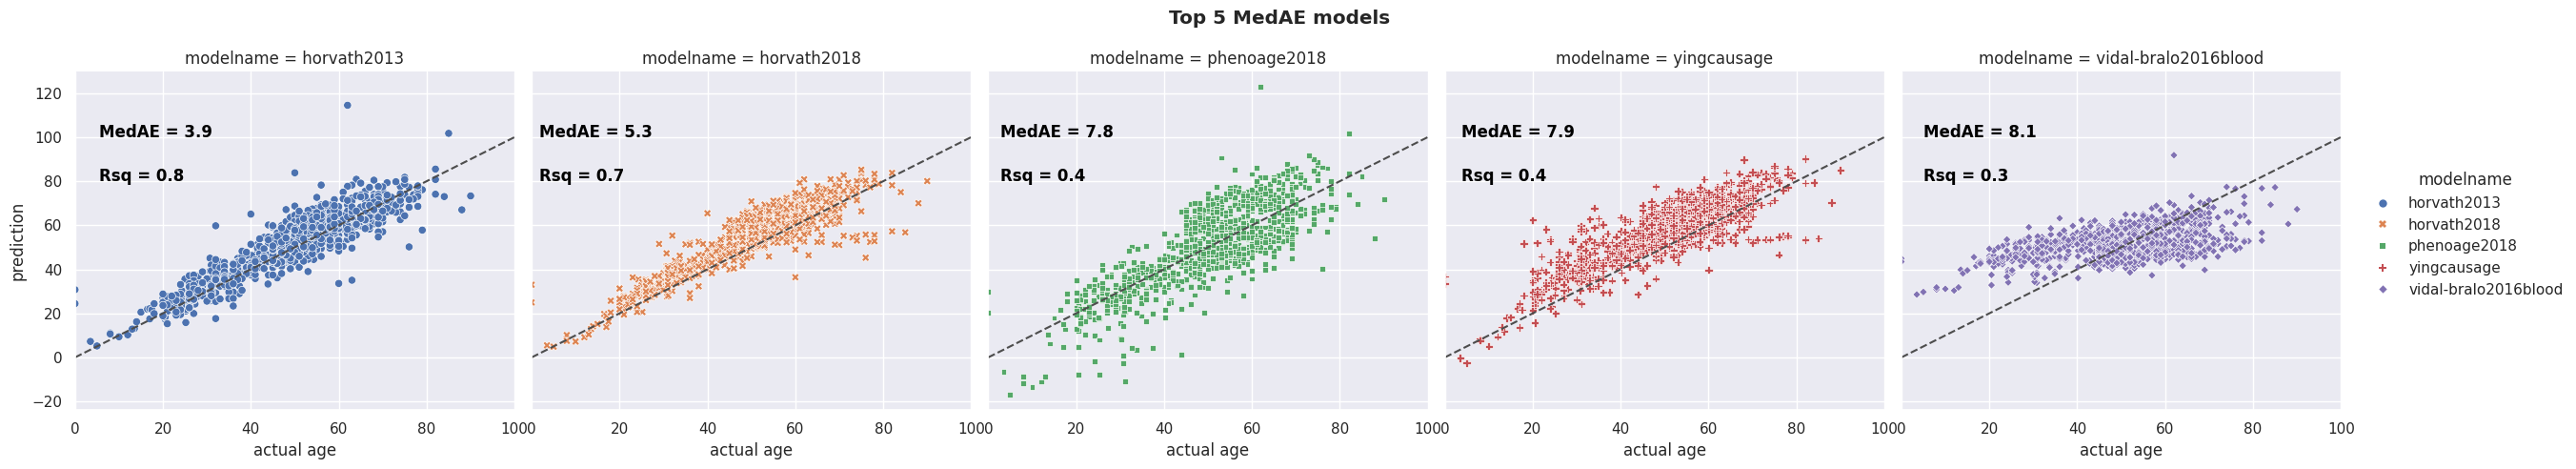

In [41]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
#plt.plot()
p1 = sns.relplot(data=dfm, y='prediction', x = 'actual age', hue='modelname', style='modelname',col='modelname')
#p1.set_xlim(1, 120)
p1.set(xlim=(0, 100))

xx = np.linspace(0, 100, 2)
yy = xx



for ax in p1.axes.flat:
    ax.plot(xx,yy,ls="--", c=".3")

p1.fig.subplots_adjust(top = 0.85)
p1.fig.suptitle('Top 5 MedAE models' , weight='bold')

plt.text(-410, 100, f'MedAE = {round(mae1,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-310, 100, f'MedAE = {round(mae2,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-205, 100, f'MedAE = {round(mae3,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-100, 100, f'MedAE = {round(mae4,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(5, 100, f'MedAE = {round(mae5,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')


plt.text(-410, 80, f'Rsq = {round(r2_1,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-310, 80, f'Rsq = {round(r2_2,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-205, 80, f'Rsq = {round(r2_3,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(-100, 80, f'Rsq = {round(r2_4,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(5, 80, f'Rsq = {round(r2_5,1)}', horizontalalignment='left', size='medium', color='black', weight='semibold')

p1.savefig('figures/top5preds.png')    
plt.show()    

<Axes: xlabel='actual age', ylabel='prediction'>

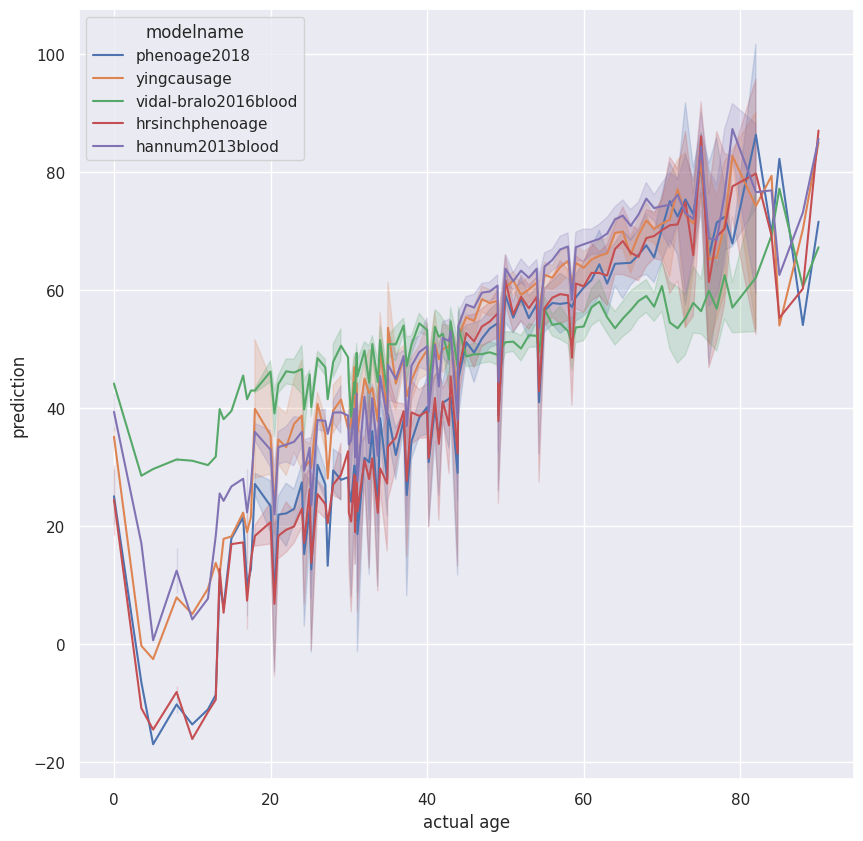

In [23]:
#fig, ax = plt.subplots(figsize = (10, 10))
fig, ax = plt.subplots(figsize = (10, 10))
sns.lineplot(data=dfm, y='prediction', x = 'actual age', hue='modelname' )